## Modeling Sequential Data Using Recurrent Neural Networks
<li>Introducing sequential data</li>
<li>RNNs for modeling sequences</li>
<li>Long short-term memory</li>
<li>Truncate backpropagation through time</li>
<li>Implementing a multilayer RNN for sequence modeling in PyTorch</li>
<li>Project one: RNN sentiment analysis of the IMDb movie review dataset</li>
<li>Project two: RNN character-level language modeling with LSTM cells, using text data from Jules Verne's *The mysterious Island*</li>
<li>Using gradient clipping to avoid explodin gradients</li>

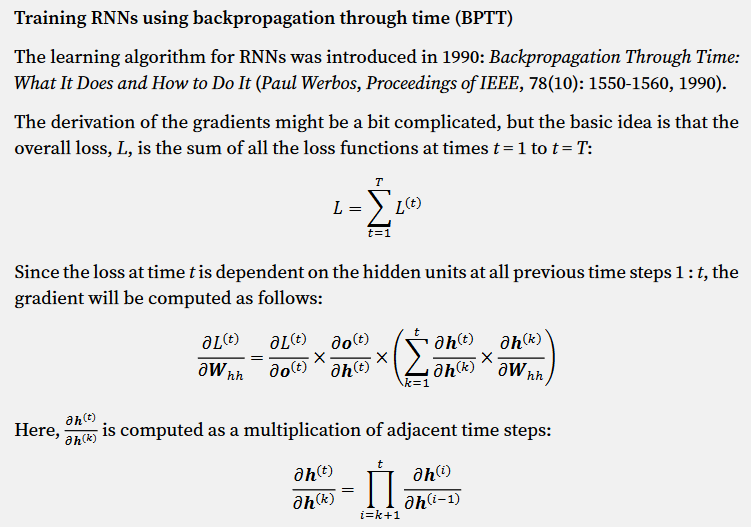

### Hidden recurrence versus output recurrence
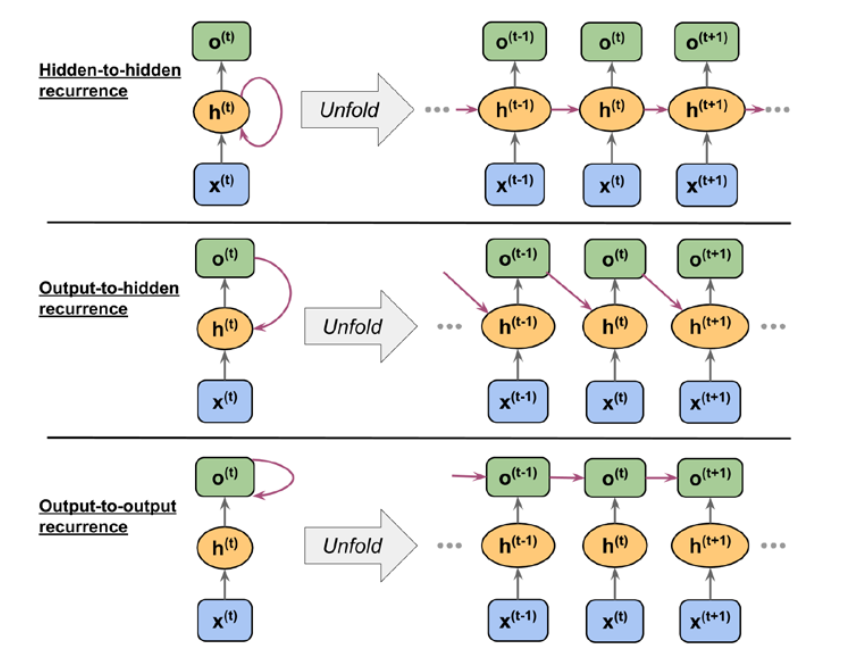

In [33]:
#output to hidden recurrence
import torch
import torch.nn as nn
torch.manual_seed(1)
rnn_layer = nn.RNN(input_size = 5, hidden_size = 2, num_layers = 1, batch_first = True)
w_xh = rnn_layer.weight_ih_l0
w_hh = rnn_layer.weight_hh_l0
b_xh = rnn_layer.bias_ih_l0
b_hh = rnn_layer.bias_hh_l0
print('W_xh shape:', w_xh.shape)
print('W_hh shape:', w_hh.shape)
print('b_xh shape:', b_xh.shape)
print('b_hh shape:', b_hh.shape)

W_xh shape: torch.Size([2, 5])
W_hh shape: torch.Size([2, 2])
b_xh shape: torch.Size([2])
b_hh shape: torch.Size([2])


In [34]:
print(rnn_layer)

RNN(5, 2, batch_first=True)


In [35]:
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()# 3 inputs x1, x2, x3, each input is of length 5 i.e. it has 5 features.

In [36]:
print(w_xh)# size of hidden layer is 2

Parameter containing:
tensor([[ 0.3643, -0.3121, -0.1371,  0.3319, -0.6657],
        [ 0.4241, -0.1455,  0.3597,  0.0983, -0.0866]], requires_grad=True)


In [37]:
print(w_hh)

Parameter containing:
tensor([[ 0.1961,  0.0349],
        [ 0.2583, -0.2756]], requires_grad=True)


In [38]:
print(b_xh)

Parameter containing:
tensor([-0.0516, -0.0637], requires_grad=True)


In [39]:
print(b_hh)

Parameter containing:
tensor([ 0.1025, -0.0028], requires_grad=True)


In [40]:
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()#3 inputs with 5 features

## output of the simple RNN
output, hn = rnn_layer(torch.reshape(x_seq, (1, 3, 5)))

## manually computing the output
out_man = []
for t in range(3):
  xt = torch.reshape(x_seq[t], (1,5))
  print('xt: ', xt)
  print(f'Time step {t} =>')
  print('   Input             :', xt.numpy())

  ht = torch.matmul(xt, torch.transpose(w_xh, 0, 1)) + b_xh
  print('    Hidden           :', ht.detach().numpy())


  if(t>0):
    prev_h = out_man[t-1]
  else:
    prev_h = torch.zeros((ht.shape))

  ot = ht + torch.matmul(prev_h, torch.transpose(w_hh, 0, 1)) + b_hh
  ot = torch.tanh(ot)
  out_man.append(ht)
  print('    Output (manual) :', ot.detach().numpy())
  print('    RNN output      :', output[:, t].detach().numpy())
  print()

xt:  tensor([[1., 1., 1., 1., 1.]])
Time step 0 =>
   Input             : [[1. 1. 1. 1. 1.]]
    Hidden           : [[-0.4701929   0.58639044]]
    Output (manual) : [[-0.3519801   0.52525216]]
    RNN output      : [[-0.3519801   0.52525216]]

xt:  tensor([[2., 2., 2., 2., 2.]])
Time step 1 =>
   Input             : [[2. 2. 2. 2. 2.]]
    Hidden           : [[-0.88883156  1.2364398 ]]
    Output (manual) : [[-0.69527835  0.74005425]]
    RNN output      : [[-0.68424344  0.76074266]]

xt:  tensor([[3., 3., 3., 3., 3.]])
Time step 2 =>
   Input             : [[3. 3. 3. 3. 3.]]
    Hidden           : [[-1.3074702  1.8864892]]
    Output (manual) : [[-0.8707492   0.86513454]]
    RNN output      : [[-0.8649416  0.9046636]]



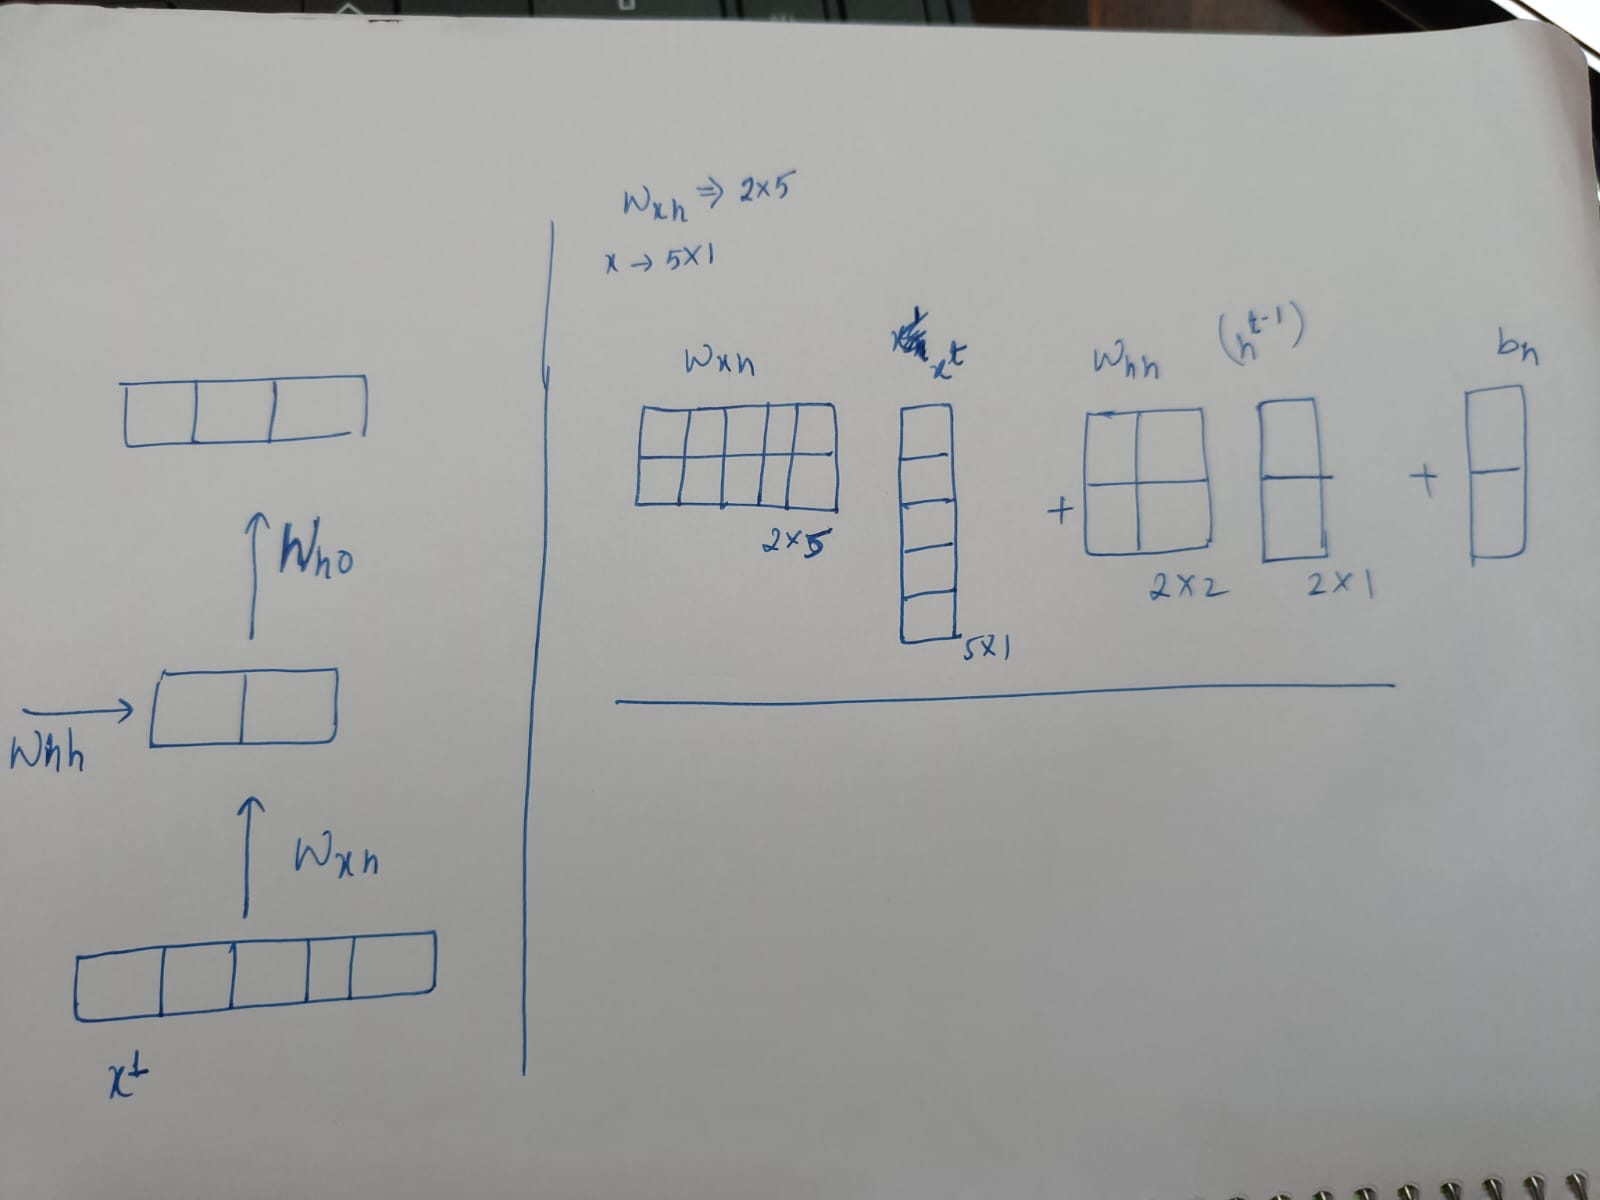

In [41]:
xt = torch.reshape(x_seq[0], (1,5))
print(xt)

tensor([[1., 1., 1., 1., 1.]])


In [42]:
output, hn = rnn_layer(torch.reshape(x_seq, (1, 3, 5)))
print(output)
print(hn)

tensor([[[-0.3520,  0.5253],
         [-0.6842,  0.7607],
         [-0.8649,  0.9047]]], grad_fn=<TransposeBackward1>)
tensor([[[-0.8649,  0.9047]]], grad_fn=<StackBackward0>)
